## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='inner', left_on='Mouse ID', right_on='Mouse ID')
column_names = ['ID', 'Drug', 'Sex', 'Age', 'Weight', 'Timepoint', 'Tumor_Volume', 'Metastatic_Sites']
combined_df.columns = column_names
combined_df.head()

,ID,Drug,Sex,Age,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Finds mice that have a datapoint at Timepoint "45" (appears to be last timepoint for treatment)
# If a mice has a timepoint at 45, adds it to a list of mice that have completed treatment.
# Afterward, a dataframe of mice that have completed treatment is generated using list.
completed_df = combined_df.loc[combined_df.Timepoint == 45, :]
completed_treatment = completed_df.ID.tolist()
completed_df = combined_df.loc[combined_df.ID.isin(completed_treatment), :]
completed_df.head()

,ID,Drug,Sex,Age,Weight,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
bydrug_df = pd.DataFrame(completed_df.groupby(['Drug', 'ID']).Tumor_Volume.agg(['mean', 'median', 'var', 'std', 'sem']))
bydrug_df.head()

mean     median        var       std       sem
Drug      ID                                                       
Capomulin b128  41.963636  42.996848   7.740275  2.782135  0.879788
          b742  40.083699  39.346396   4.722298  2.173085  0.687190
          g288  41.990097  42.621576  12.166513  3.488053  1.103019
          g316  44.613344  44.851416   3.149668  1.774730  0.561219
          i557  44.805810  44.798109   2.892107  1.700620  0.537783

In [4]:
treat_count_df = pd.DataFrame(combined_df.groupby('Drug').ID.count())
treat_count_df["Drug"] = treat_count_df.index
treat_count_df.reset_index(drop=True, inplace=True)
drug_name = treat_count_df.Drug.tolist()
treatment_count = treat_count_df.ID

## Bar plots

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

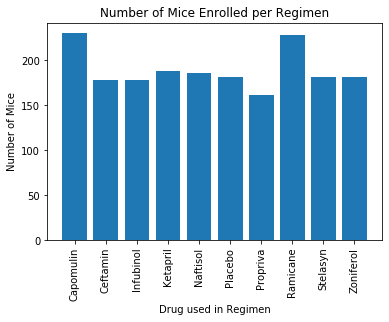

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.title("Number of Mice Enrolled per Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug used in Regimen")
plt.xticks(rotation='vertical')
plt.bar(drug_name, treatment_count)
plt.show()

## Pie plots

In [7]:
# Creates a dataframe sorted by unique ID and what sex it is
unique_df = pd.DataFrame(completed_df.groupby(["ID", "Sex"]).Sex.count())
unique_df["Sex"] = unique_df.index.get_level_values(1)
unique_df.index = unique_df.index.get_level_values(0)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

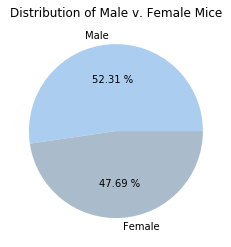

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male = unique_df.loc[unique_df.Sex == 'Male'].count()[0]
female = unique_df.loc[unique_df.Sex == 'Female'].count()[0]

labels = ['Male', 'Female']
colors = ['#abcdef', '#aabbcc']

plt.title('Distribution of Male v. Female Mice')
plt.pie([male, female], labels = labels, colors=colors, autopct='%.2f %%')

plt.show()

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen